In [ ]:
#Loading Packages

from IPython.display import display
import pandas as pd
import scipy.stats as scs                 
import numpy as np  #for mathematical calculation
import seaborn as sns   #for data visualization
import matplotlib.pyplot as plt # for plotting graphs
import missingno as msno
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("/content/train dataset.csv")
test = pd.read_csv("/content/test dataset.csv")
print(train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     Applicant_Income  Coapplicant_Income  Loan_Amount  Loan_Amount_Term  \
0                5849                 0.0          NaN     

In [ ]:
#type of data
train.dtypes 

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [ ]:
#summary
train.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Exploratory Data Analysis

Univariate Visual Analysis

Target Variable - Loan Status

Y    422
N    192
Name: Loan_Status, dtype: int64

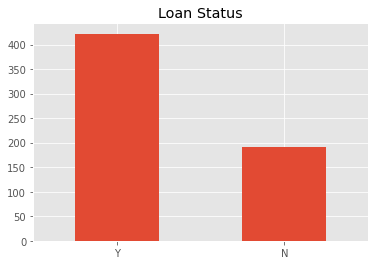

In [ ]:
plt.style.use('ggplot')
train['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0)
display(train['Loan_Status'].value_counts())

Predictor Variables

There are 3 types of Independent Variables: Categorical, Ordinal & Numerical.

Categorical Features

Gender

Marrital Status

Employment Type

Credit Hystory

Male      489
Female    112
Name: Gender, dtype: int64

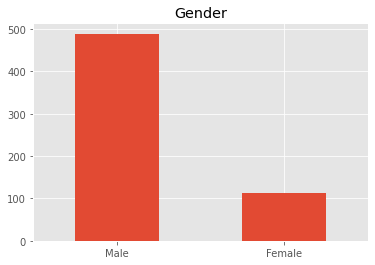

In [ ]:
plt.style.use('ggplot')
train['Gender'].value_counts().plot.bar(title='Gender',rot=0)
display(train['Gender'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64

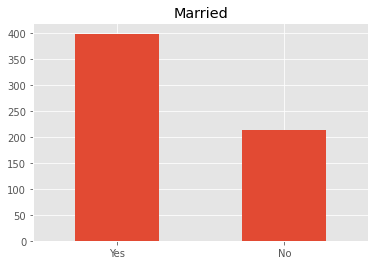

In [ ]:
plt.style.use('ggplot')
train['Married'].value_counts().plot.bar(title='Married',rot=0)
display(train['Married'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64

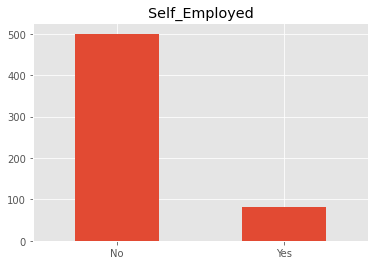

In [ ]:
plt.style.use('ggplot')
train['Self_Employed'].value_counts().plot.bar(title='Self_Employed',rot=0)
display(train['Self_Employed'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64

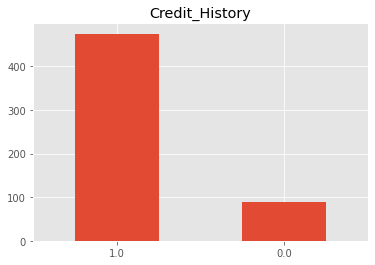

In [ ]:
plt.style.use('ggplot')
train['Credit_History'].value_counts().plot.bar(title='Credit_History',rot=0)
display(train['Credit_History'].value_counts())

Ordinal Features

Number of Dependents

Education Level

Property or Area Background

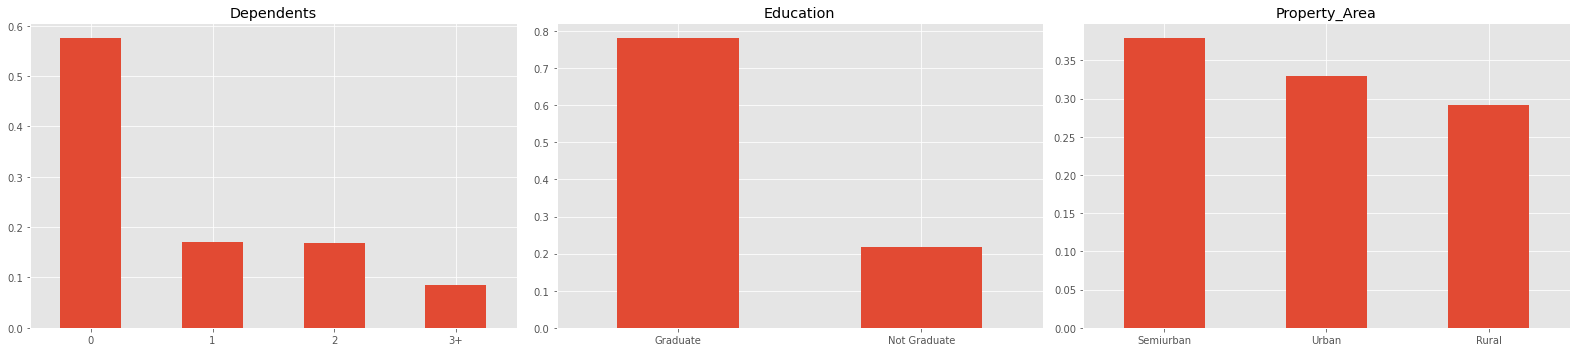

In [ ]:
fig2, ax2= plt.subplots(1,3)


train['Dependents'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Dependents',rot=0)

train['Education'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Education',rot=0)

train['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Property_Area',rot=0)

fig2.tight_layout()

Numerical Features

The Applicant's Income

The Co-Applicant's Income

**Displot represents the overall distribution of continuous data variable**

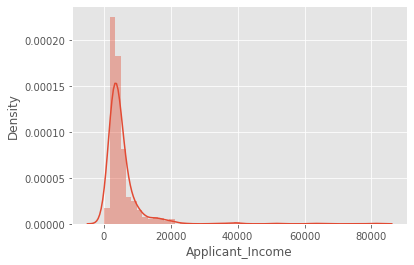

In [ ]:
sns.distplot(train['Applicant_Income'])

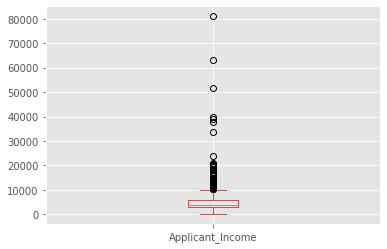

In [ ]:
train['Applicant_Income'].plot.box()

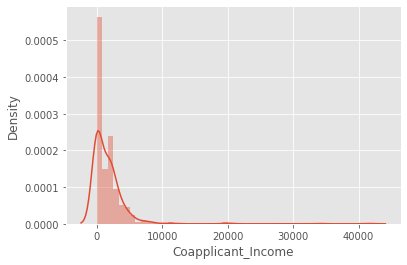

In [ ]:
sns.distplot(train['Coapplicant_Income'])

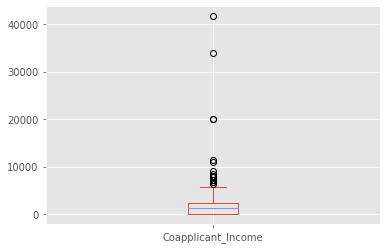

In [ ]:
train['Coapplicant_Income'].plot.box()

Bivariate Analysis

Bivariate analysis is finding some kind of empirical relationship between two variables. Specifically the dependent vs independent Variables

Categorical Independent Vs Target

Gender Vs Loan_Status

In [ ]:
bins= [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very high']
train['Income_bin']=pd.cut(train['Applicant_Income'],bins,labels=group)

Hypothesis Testing


Data Cleaning

Converting Categorical to Numeric variables

In [ ]:
train=train.drop(['Loan_ID'],axis=1)

train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0, inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

Missing Value Imputation

In [ ]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
Income_bin             0
dtype: int64

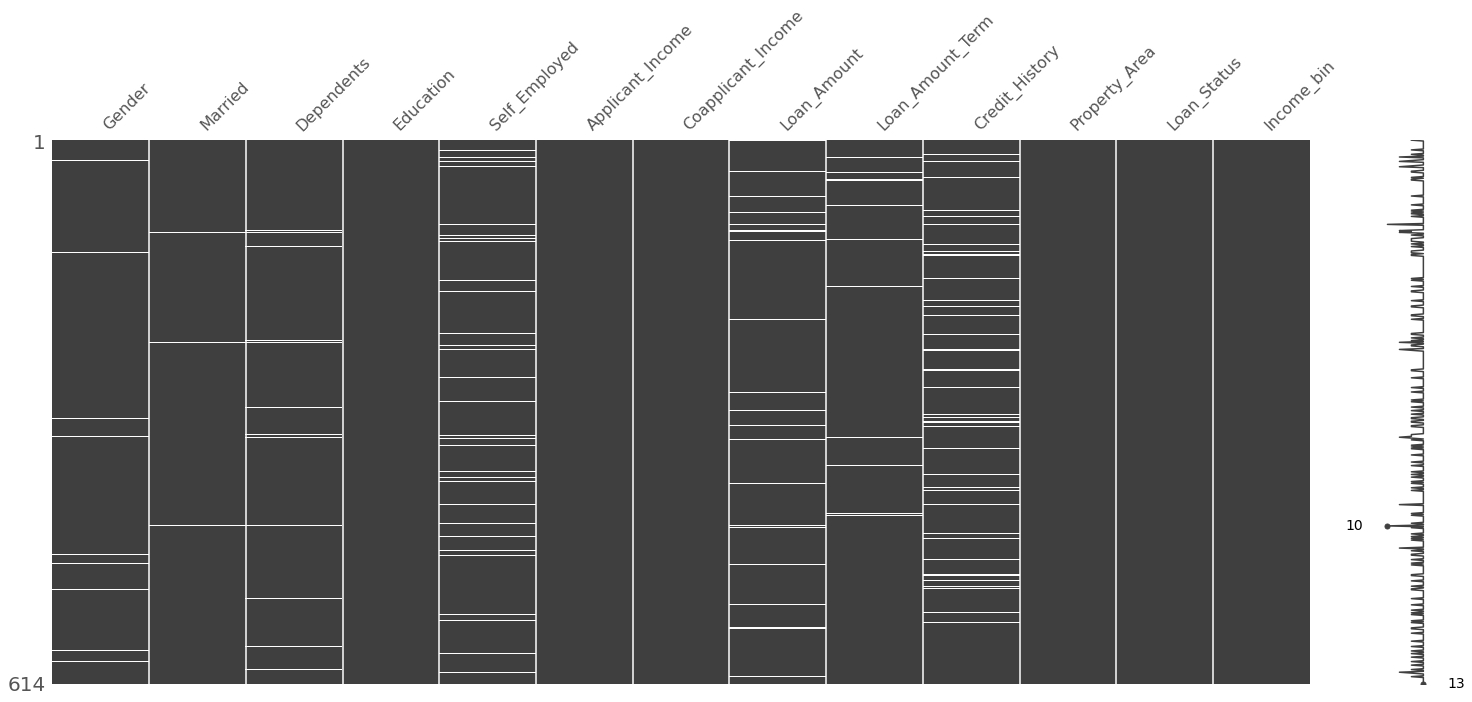

In [ ]:
msno.matrix(train)
plt.show()

missingno matrix plot showing data sparsity across all dataframe columns.It shows the missing values in each column


In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Loan_Amount'].fillna(train['Loan_Amount'].median(), inplace=True)

In [ ]:
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
Income_bin            0
dtype: int64

In [ ]:
matrix= train.corr() 
print(train.head())
Catos = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for cato in Catos:
    train[cato] = train[cato].astype('category').cat.codes

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0      Graduate            No              5849   
1   Male     Yes          1      Graduate            No              4583   
2   Male     Yes          0      Graduate           Yes              3000   
3   Male     Yes          0  Not Graduate            No              2583   
4   Male      No          0      Graduate            No              6000   

   Coapplicant_Income  Loan_Amount  Loan_Amount_Term  Credit_History  \
0                 0.0        128.0             360.0             1.0   
1              1508.0        128.0             360.0             1.0   
2                 0.0         66.0             360.0             1.0   
3              2358.0        120.0             360.0             1.0   
4                 0.0        141.0             360.0             1.0   

  Property_Area  Loan_Status Income_bin  
0         Urban            1       High  
1         Rural     

Visualizing correlation via Heatmap

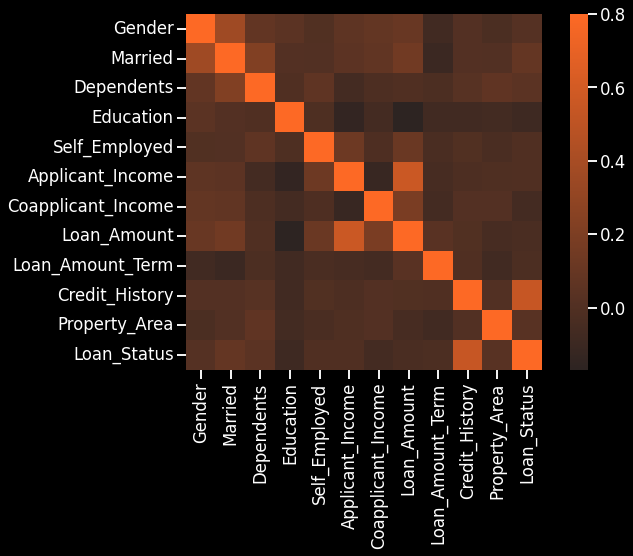

In [ ]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
matrix= train.corr() 
fig, ax = plt.subplots(figsize=(9,6))
cmap = sns.dark_palette("#fd6925", as_cmap=True)
fig.tight_layout()
HeatM = sns.heatmap(matrix,vmax=.8,square=True, cmap=cmap)
plt.rcParams['figure.figsize']=(10,10)
fig = HeatM.get_figure()
fig.savefig('output.png', transparent=True)

Correlation between Quantitative Variables

In [ ]:
np.corrcoef(train['Loan_Amount'], train['Applicant_Income'])

array([[1.        , 0.56518052],
       [0.56518052, 1.        ]])

In [ ]:
np.corrcoef(train['Loan_Amount'], train['Coapplicant_Income'])

array([[1.        , 0.18921778],
       [0.18921778, 1.        ]])

Outlier Treatment

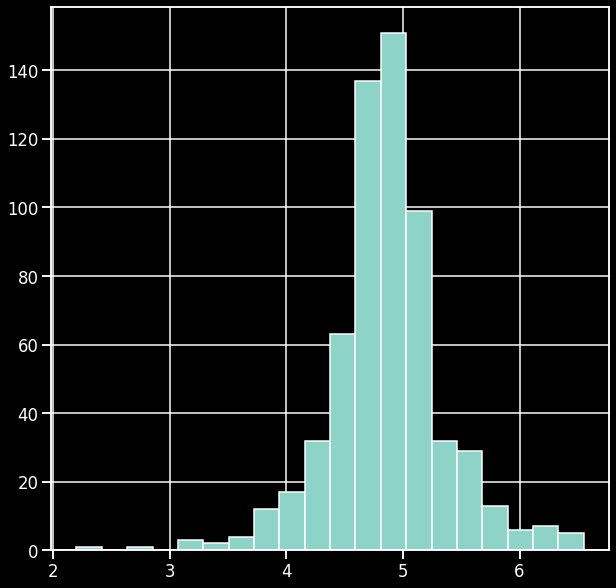

In [ ]:
y=train.Loan_Status
train_V1=train.drop('Loan_Status',1)
train['Loan_Amount_log']=np.log(train['Loan_Amount'])
train['Loan_Amount_log'].hist(bins=20)

Dummy variables for categorical variables

In [ ]:
train_V1=pd.get_dummies(train_V1)
train=pd.get_dummies(train)

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.Logit(y,train_V1 )
result=model1.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.464602
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      599
Method:                           MLE   Df Model:                           14
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.2521
Time:                        05:27:43   Log-Likelihood:                -285.27
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 1.988e-33
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                  -0.0718      0.291     -0.247      0.805      -0.641       0.498

In [ ]:
model_V1=LogisticRegression()
model_V1.fit(train_V1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V1.coef_).T).tolist(),'variable':train_V1.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
9,20.414081,Credit_History
1,1.724906,Married
12,1.232408,Income_bin_Average
0,1.108837,Gender
11,1.075451,Income_bin_Low
10,1.011615,Property_Area
5,1.000009,Applicant_Income
6,0.999931,Coapplicant_Income
7,0.998265,Loan_Amount
13,0.998051,Income_bin_High


In [ ]:
predicted_1 = model_V1.predict(train_V1)
accuracy_score(y,predicted_1)

0.8110749185667753

Creating New Models

As we can see p value for only credit history is less than 0.05. Hence we will remove all other independent variables and create new model and check its accuracy

In [ ]:
train_V2 = train.filter(['Credit_History'], axis=1)
train_V2=pd.get_dummies(train_V2)


In [ ]:
model2=sm.Logit(y,train_V2 )

result2=model2.fit()

print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.539390
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                            0
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1318
Time:                        05:27:43   Log-Likelihood:                -331.19
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Credit_History     1.3278      0.107     12.381      0.000       1.118       1.538


In [ ]:
model_V2=LogisticRegression()
model_V2.fit(train_V2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,
                   multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V2.coef_).T).tolist(),'variable':train_V2.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
0,27.69363,Credit_History


In [ ]:
predicted_2 = model_V2.predict(train_V2)
accuracy_score(y,predicted_2)

0.8094462540716613

Creating second model

While finding correlation between independent variables, we found that applicant income and loan amount have good correlation so we will remove one of the variables from the data and then create a model.

In [ ]:
train_V3 = train_V1.drop(['Applicant_Income'], axis=1)
train_V3 =pd.get_dummies(train_V3)

In [ ]:
model3=sm.Logit(y,train_V3 )

result3=model3.fit()

print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.465379
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      600
Method:                           MLE   Df Model:                           13
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.2509
Time:                        05:27:43   Log-Likelihood:                -285.74
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 7.909e-34
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                  -0.0732      0.290     -0.252      0.801      -0.642       0.496

Odds Ratio

An odds ratio is a statistic that quantifies the strength of the association

In [ ]:
model_V3=LogisticRegression()
model_V3.fit(train_V3,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V3.coef_).T).tolist(),'variable':train_V3.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
8,23.196315,Credit_History
1,1.521469,Married
10,1.107705,Income_bin_Low
11,1.073389,Income_bin_Average
2,1.022282,Dependents
4,1.015587,Self_Employed
5,0.999932,Coapplicant_Income
6,0.998721,Loan_Amount
7,0.995727,Loan_Amount_Term
9,0.959736,Property_Area


In [ ]:
predicted_3 = model_V3.predict(train_V3)
accuracy_score(y,predicted_3)

0.8094462540716613

Creating third model with two columns credit history and coapplicant income

In [ ]:
train_V4 = train.filter(['Credit_History', 'Coapplicant_Income'], axis=1)
train_V4=pd.get_dummies(train_V4)

In [ ]:
model4=sm.Logit(y,train_V4 )

result4=model4.fit()

print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.530149
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      612
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1466
Time:                        05:27:44   Log-Likelihood:                -325.51
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 3.818e-26
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Credit_History         1.5175      0.126     12.004      0.000       1.270       1.765
Coapp

In [ ]:
model_V4 = LogisticRegression()
model_V4.fit(train_V4,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V4.coef_).T).tolist(),'variable':train_V4.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
0,28.048905,Credit_History
1,0.999948,Coapplicant_Income


In [ ]:
predicted_4 = model_V4.predict(train_V4)
accuracy_score(y,predicted_4)

0.8127035830618893

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_V4, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


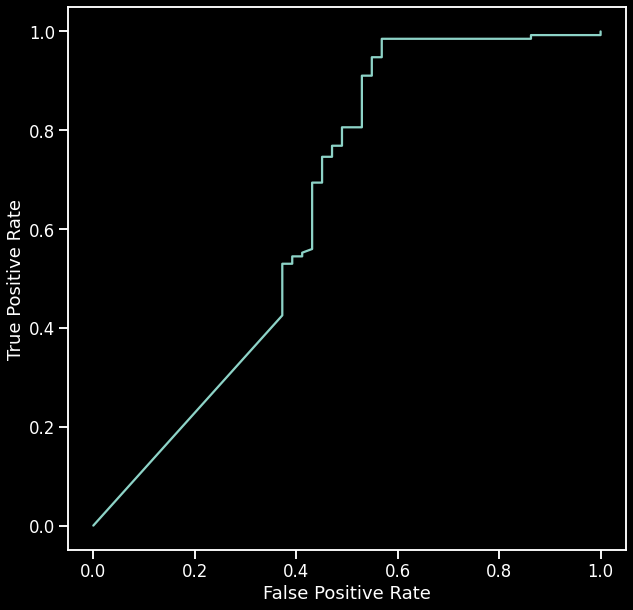

In [ ]:
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

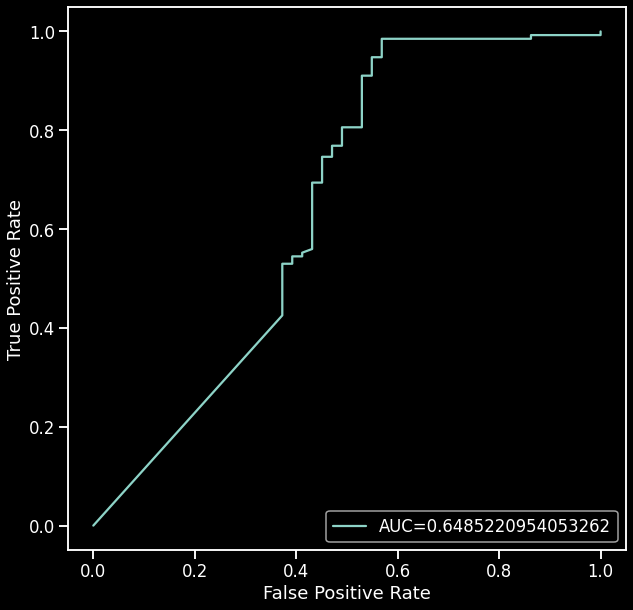

In [ ]:
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Interpretation: The Area Under the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better. Here our AUC score is 0.6, so this is not so good score at all.


Feature: 0, Score: -0.07861
Feature: 1, Score: -0.45829
Feature: 2, Score: 0.26020
Feature: 3, Score: 0.19016
Feature: 4, Score: -0.12267
Feature: 5, Score: -0.40688
Feature: 6, Score: 0.03563
Feature: 7, Score: -0.64036
Feature: 8, Score: -0.52091
Feature: 9, Score: 0.47843
Feature: 10, Score: 0.16818


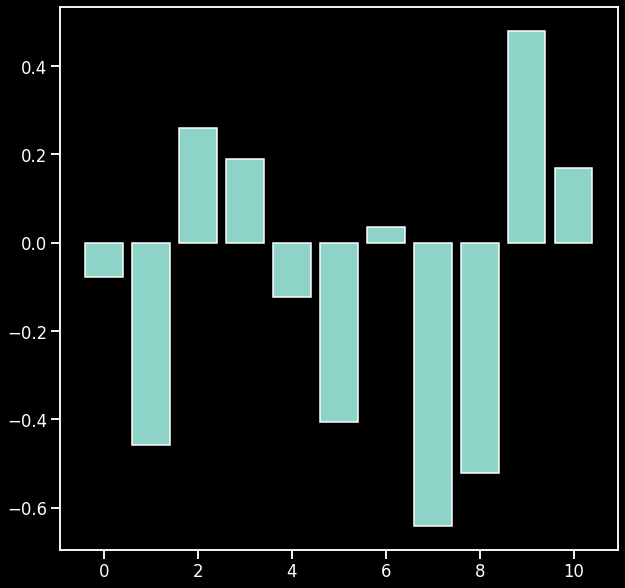

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=11, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
!pip install xgboost==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install xgboost==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Finding best hyperparameters using Grid Search method for Random Forest to function

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [ ]:
bestF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rfc = RandomForestClassifier(random_state = 1, max_depth = 8,
                             n_estimators = 1200, min_samples_split = 15, min_samples_leaf = 2)                                  
modelr = rfc.fit(X_train, y_train)
y_pred = modelr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8324324324324325

In [ ]:
rfc.feature_importances_

array([0.69250747, 0.30749253])

In [ ]:
%%time

# Finding best hyperparameters for XGBoost to run using GridSearch method

import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_test, y_test)]
model = xgb.XGBClassifier(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Streaming output truncated to the last 5000 lines.
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:47:52] WARNING: ../src/learner.cc:541: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:47:52] WARNING: ../src/learner.cc:541: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:47:52] WARNING: ../src/learner.cc:541: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate 

In [ ]:
modelxg = xgb.XGBClassifier(gamma = 0.001, learning_rate = 0.001, max_depth = 8, n_estimators = 200, random_state = 42, objective='reg:squarederror')
modelxg.fit(X_train,y_train, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=2, num_parallel_tree=1,
              objective='reg:squarederror', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_xg = modelxg.predict(X_test)
accuracy_score(y_test, y_xg)

0.7891891891891892